In [2]:
import os
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [3]:
%matplotlib inline
plt.style.use('dark_background')

In [4]:
# path_to_folder = '/content/drive/MyDrive/SMAI Project/'
path_to_folder = './'

## Get Face Matrix

In [49]:
neutral_faces = []
for i in range(1,201):
    im = cv2.imread(path_to_folder+"dataset/"+str(i)+"a.jpg",0)
    im = cv2.resize(im, (58,49), fx=0.5, fy=0.5, interpolation = cv2.INTER_AREA)
    neutral_faces.append(im.flatten())

In [50]:
face_matrix = np.vstack(neutral_faces)
face_matrix, face_matrix.shape

(array([[254, 254, 254, ...,  57,  59,  70],
        [ 42,  34,  35, ...,  73,  48,   0],
        [ 95,  60,  43, ...,  61,  61,  58],
        ...,
        [210, 198, 146, ...,   5,   5,   4],
        [182, 204, 207, ...,  19,   0,   7],
        [213, 217, 202, ..., 110, 135, 151]], dtype=uint8),
 (200, 2842))

## Get Mean of Faces

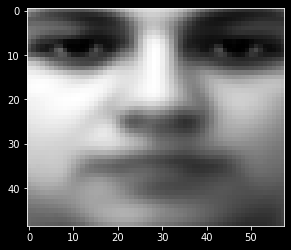

In [51]:
mean_face_array = np.mean(face_matrix,axis=0)
mean_face = mean_face_array.reshape(49,58)
plt.imshow(mean_face,cmap='gray',vmin=np.amin(mean_face),vmax=np.amax(mean_face))

## Get Singular Value Decomposition of Covariance Matrix

In [52]:
def eigen(mat):
    # To be implemented manually
    U , D , V = np.linalg.svd(mat)
    return U , D

In [66]:
eigen_vecs, eigen_vals = eigen(np.cov((face_matrix-mean_face_array).T))
eigen_vecs = eigen_vecs.T[np.argsort(eigen_vals)[-7:][::-1]].T
eigen_vals = np.sort(eigen_vals)[-7:][::-1]

In [54]:
# eigen_vecs = eigen_vecs.T[np.argsort(eigen_vals)].T

In [55]:
# eigen_vecs @ np.diag(eigen_vals) @ V, np.cov((face_matrix-mean_face_array).T)

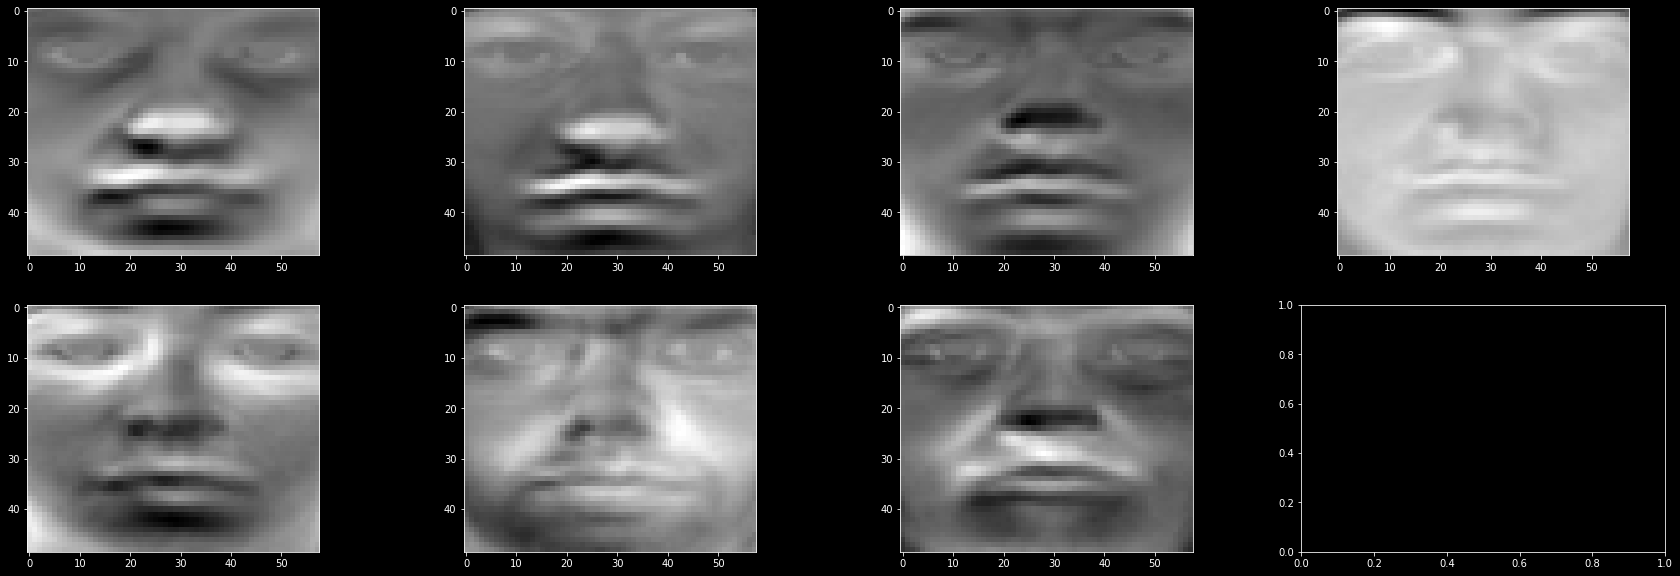

In [67]:
f,ax = plt.subplots(nrows=2,ncols=4,figsize=(30,10))
for i in range(7):
    ax[i//4,i%4].imshow(eigen_vecs[:,i].reshape(49,58),cmap='gray')
plt.show()

In [72]:
projected_data = np.dot(face_matrix.T, eigen_vecs)
# projected_data.shape
face_matrix.shape, eigen_vecs.shape
# f,ax = plt.subplots(nrows=2,ncols=5,figsize=(30,10))
# for i in range(10):
#     ax[i//5,i%5].imshow(projected_data[:,i].reshape(49,58),cmap='gray')
# plt.show()

ValueError: shapes (2842,200) and (2842,7) not aligned: 200 (dim 1) != 2842 (dim 0)